<a href="https://colab.research.google.com/github/mohmaed7777/Ml_indabax_day1/blob/main/Ml_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Attribute Information:**



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
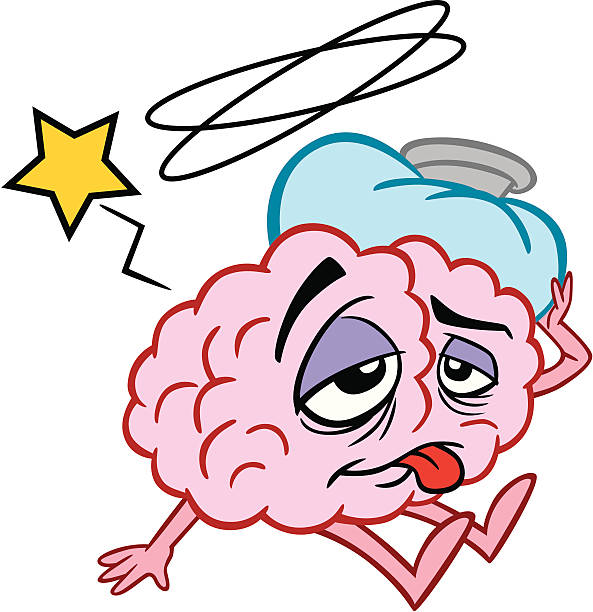


1) **gender**: 
"Male", "Female" or "Other"

2) **age**: age of the patient

3) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) **ever_married**: "No" or "Yes"

6) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

7)**Residence_type**: "Rural" or "Urban"

8) **avg_glucose_level**: average glucose level in blood

9) **bmi**: body mass index

10) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
# Starting with importing the requried modules 
import pandas as pd
#For  data manipulation and analysis. In particular
#it offers data structures and operations for manipulating numerical tables and time series.
import numpy as np 
# is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions.(Linear Algebra)
import matplotlib.pyplot as plt 
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import seaborn  as sns 
# Seaborn is a Python data visualization library based on matplotlib, 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import sklearn 
# Scikit-learn is a free software machine learning library for the Python programming language, 
# It features various classification & regression 
%matplotlib inline 
# It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object). 
sns.set()
#  You can also customize seaborn theme or use one of six variations of the default theme,
#  Which are called deep, muted, pastel, bright, dark, and colorblind.
print('Setup Complete!')

Setup Complete!


In [ ]:
data_path = '/content/healthcare-dataset-stroke-data.csv' # We can Store our dataset as var in order to use it for different tasks
df = pd.read_csv(data_path) #  is an important pandas function to read csv files and do operations on it
df.head() # For representing the first five rows 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail() # Fuction could be used to present the last five rows in the dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**EDA and preprocessing:**

In [ ]:
df.dtypes # Return the dtypes in the DataFrame. This returns a Series with the data type of each column.

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info() # This method prints information about a DataFrame, 
# including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.dtypes.value_counts() # Return a Series containing counts of unique rows in the DataFrame.

object     5
int64      4
float64    3
dtype: int64

**Data Cleaning with pandas :**


Why do we need to clean up our dataset ???? 


Data cleansing is also important because it improves your data quality and in doing so, increases overall productivity. When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information.



In [ ]:
# First let's to checkout the missing values do we have on this dataframe and the we can decide to clean up (remove) them,
# or leave them !!!
missing_values = df.isnull().sum() # get the number of missing data points per column.
missing_values[:] # look at the whole missing points at all columns

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# This time we do need to know the percentage %  of the mssing values in the dataset!!!

total_cells = np.product(df.shape) # returns the product of array elements over a given axis.
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.32778864970645794


In [ ]:
# it seems like we do not have that huge amout of missing values , but now we want to remove ,
# Some columns like (bmi) cuz it contains some NAN"S and that is going to affect the ML model work when it comes to predictions.

df.drop(['id', 'bmi'],axis=1, inplace=True) #Remove rows or columns by specifying label names and corresponding axis,
# or by specifying directly index or column names. 

In [ ]:
df.describe() # Descriptive statistics include those that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values. NOTE ==> this funtion just will represent the numaric values.

,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,0.048728
std,22.612647,0.296607,0.226063,45.283560,0.215320
min,0.080000,0.000000,0.000000,55.120000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,0.000000
max,82.000000,1.000000,1.000000,271.740000,1.000000


In [ ]:
df.describe(include='object') # here by adding this argument (include='object') it allows us to look across the object(string) values

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#**Encode the categorical variables:**

What is **Encoding** ???

The **performance** of a **machine learning model** not only depends on the model and the hyperparameters but also **on how we process and feed different types of variables to the model**. Since most machine learning models **only accept numerical variables**, **preprocessing the categorical variables becomes a necessary step**. **We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information**

In [ ]:
df_uniques = df.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
binary_vals = list(df_uniques[df_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
binary_vals

['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']

In [ ]:
df[binary_vals].dtypes # Check the datatypes in case if it needs to be encoded (converted into numaric values^_^)

hypertension       int64
heart_disease      int64
ever_married      object
Residence_type    object
stroke             int64
dtype: object

In [ ]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['gender', 'work_type', 'smoking_status']

In [ ]:
[[i, list(df[i].unique())] for i in categorical_vals] 
# iterating over all the cate_values and ordering them for applying the encoding process

[['gender', ['Male', 'Female', 'Other']],
 ['work_type',
  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']],
 ['smoking_status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown']]]

In [ ]:
numaric_vals = list(set(df.columns) - set(categorical_vals)- set(binary_vals))
# Extending the numaric values among cate_vals, dataframe columns and bin_values
numaric_vals

['age', 'avg_glucose_level']

**The Encoding process:**

In [ ]:

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder


**LabelBinarizer:** for converting bin_values(Yes or NO, True or Flase) into (0 & 1).

**LabelEncoder:**Used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

**OrdinalEncoder:**In ordinal encoding, each unique category value is assigned an integer value.For example, “red” is 1, “green” is 2, and “blue” is 3.This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [ ]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

In [ ]:
for col in categorical_vals: 
  df[col] = le.fit_transform(df[col])

In [ ]:
for col in binary_vals:
  df[col] = lb.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1


In [ ]:
df.stroke.value_counts() 
# Return a Series containing counts of values in our Y (target) after encoding ,
# 1 refers to have Stroke & 0 refers to don't have Stroke

0    4861
1     249
Name: stroke, dtype: int64

**Data Presention:-**

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Class distribution of 249 patients Have been already diagnosed with brain stroke and 4861 Haven not been diagnosed with Brain stroke '),
 Text(0.5, 1.0, 'Brain Stroke')]

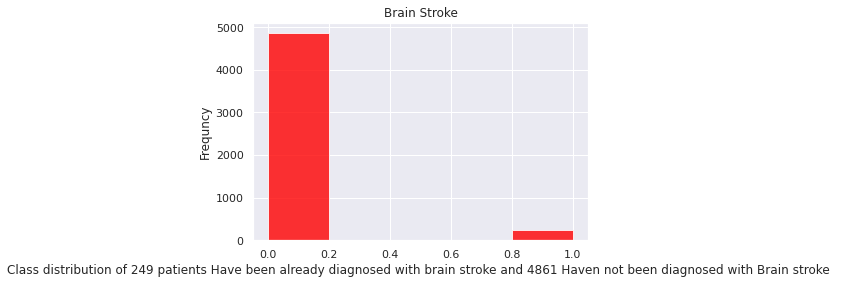

In [ ]:
# create a histogram: 

ax = plt.axes()
ax.hist(df.stroke, bins=5, alpha=0.8, color='red')
ax.set(xlabel='Class distribution of 249 patients Have been already diagnosed with brain stroke and 4861 Haven not been diagnosed with Brain stroke ',
       ylabel='Frequncy',
       title='Brain Stroke')

**Initiate Features Variables :**

A feature is a measurable property of the object you’re trying to analyze. In datasets, features appear as columns.

In [ ]:
# Create Feature columns :
features_col = [x for x in df.columns if x not in 'stroke']
features_col

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'smoking_status']

In [ ]:
df[features_col]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,2,1,228.69,1
1,0,61.0,0,0,1,3,0,202.21,2
2,1,80.0,0,1,1,2,0,105.92,2
3,0,49.0,0,0,1,2,1,171.23,3
4,0,79.0,1,0,1,3,0,174.12,2
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,2
5106,0,81.0,0,0,1,3,1,125.20,2
5107,0,35.0,0,0,1,3,0,82.99,2
5108,1,51.0,0,0,1,2,0,166.29,1


#**Train Test Split:**

**What is Train test split??**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:**

 Used to fit the machine learning model.

**Test Dataset:**

Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

**Here we will be Using Starified_Shuffle_split method , which is based on sklearn to maintain the same ratio of predictor classes and regardless method used to split the data we should afterwards commpare the ratio of classes in both train and test sets.**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.
# The folds are made by preserving the percentage of samples for each class.

In [ ]:
# Get the index values from the genetor: 
train_index , test_index = next(strat_shuff_split.split(df[features_col], df['stroke']))

In [ ]:
# Create the datasets : 
x_train = df.loc[train_index, features_col]
y_train = df.loc[train_index, 'stroke']
x_test = df.loc[test_index, features_col]
y_test = df.loc[test_index, 'stroke']

**Normalize Trainsets and Testsets**:

Normalization is a technique for organizing data in a database. It is important that a database is normalized to minimize redundancy (duplicate data) and to ensure only related data is stored in each table.

In [ ]:
# Checking the perentage compistion of each level in the train and test sets: 
y_train.value_counts(normalize=True).sort_index()

0    0.951338
1    0.048662
Name: stroke, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

0    0.951
1    0.049
Name: stroke, dtype: float64

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,1.000000


# **1/ K-nearest-neighbors-algorithm:**

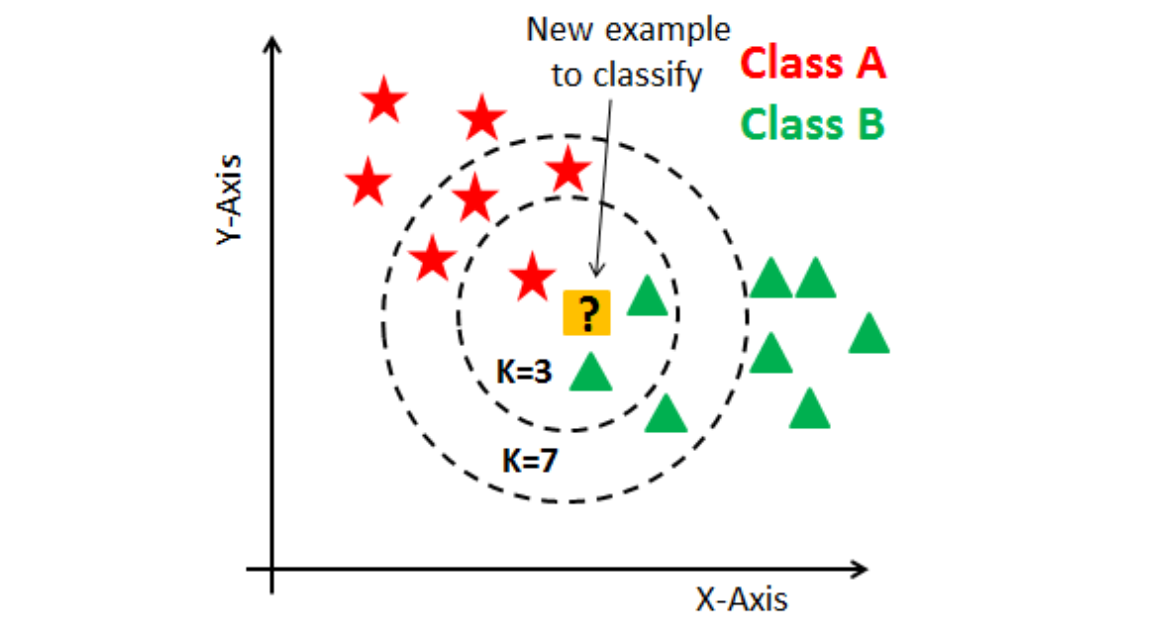


**K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.**

In [ ]:
# Estimate Knn model and report the outcome : 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create the model : 
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
# Train (fit) the model :
knn = knn.fit(x_train, y_train)

In [ ]:
# Make a prediction at the first 5 rows regrads (k = 3) till we dertmine the optimum value of k 
y_pred = knn.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

**Model Validation and Accuracy:**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
print(classification_report(y_test, y_pred))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred,2)))
print("F1_score: ", round(f1_score(y_test, y_pred,2)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       951
           1       0.10      0.02      0.03        49

    accuracy                           0.94      1000
   macro avg       0.53      0.51      0.50      1000
weighted avg       0.91      0.94      0.92      1000

Accuracy Score: 1
F1_score:  0


#**Applying Decision Trees Classifier:-**

**Decision tree learning or induction of decision trees is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.**

**1/ Fit a decision tree classifier with NO set limits on maximum depth features and leaves.**

**2/ Determine how many nodes are present and what the depth of this (very large) tree is?.**

**3/ Using this tree to measure the predication error in the train and test dataset.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Create the model 
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the model
dt = dt.fit(x_train, y_train)

In [ ]:
# Determine the number of nodes and maximum depth:
dt.tree_.node_count, dt.tree_.max_depth

(657, 18)

**Identify the Error Metrics:**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [ ]:
# This step may lead to overfitting because we did not prune the tree:
y_train_pred = dt.predict(x_train)


In [ ]:
y_test_pred = dt.predict(x_test)

In [ ]:
y_test_pred[:5]

array([0, 0, 0, 0, 0])

**Check the model accuracy and error measurement:-**

Note ==> The maximum depth of leaves for the model above has not been declared. 

In [ ]:
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred,'test')],axis=1)

In [ ]:
train_test_full_error

,train,test
accuracy,1.0,0.915000
precision,1.0,0.166667
recall,1.0,0.183673
f1,1.0,0.174757


**//Using grid search with cross validation to find a decision Tree that perform well on the train and test sets//:-**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1,2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)              

In [ ]:
# Fit the Grid Search model: 
GR = GR.fit(x_train, y_train)

In [ ]:
# Get the number of the nodes and Maximmum Depth: 
GR.best_estimator_.tree_.node_count , GR.best_estimator_.tree_.max_depth

(3, 1)

In [ ]:
# Make predication: 
y_train_pred_gr = GR.predict(x_train)
y_train_pred_gr[:]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test_pred_gr = GR.predict(x_test)
y_test_pred_gr[:5]

array([0, 0, 0, 0, 0])

**Check the GR model accuracy and error measurement:-**

Note : Here we use the fixed amount of nodes and the maximum depth is known 

In [ ]:
train_test_full_error_gr = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                   measure_error(y_test, y_test_pred_gr,'test')],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_test_full_error_gr

,train,test
accuracy,0.951338,0.951
precision,0.000000,0.000
recall,0.000000,0.000
f1,0.000000,0.000


#**3/ Appying RandomForest Classisfier:**
**The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.**

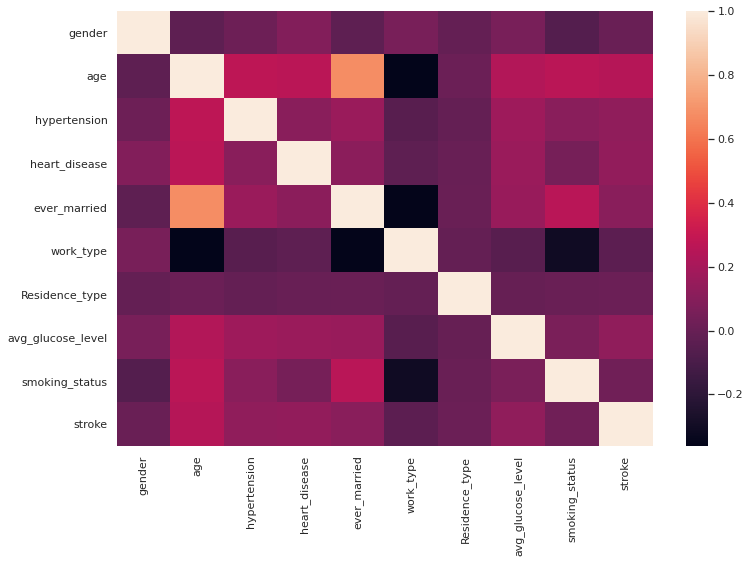

In [ ]:
# Create a heatmap for checking variables correlations : 
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr())

**+ Fit RandomForest models with range of trees and evaluate the out of bag error of these models.**

**+ plot the resulting out of baggging errors as a function of the number of trees.**

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore", category= UserWarning)
warnings.filterwarnings("ignore", category= RuntimeWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs = -1)

oob_list = list()
for n_trees in [15, 20, 50 , 60, 100, 110, 115, 200, 260, 300, 500, 550, 600, 670, 700, 780, 800]:
  RF.set_params(n_estimators=n_trees)

  # Fit the model : 
  RF.fit(x_train, y_train)

  # Get the oob Erros:
  oob_error = 1 - RF.oob_score_
  # Score it : 
  oob_list.append(pd.Series({'n_trees': n_trees, 'OOb':oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')  
rf_oob_df

,OOb
n_trees,
15.0,0.060584
20.0,0.056691
50.0,0.054501
60.0,0.053041
100.0,0.052798
110.0,0.052311
115.0,0.052555
200.0,0.051338
260.0,0.051582


[Text(0, 0.5, 'out of bagging Error')]

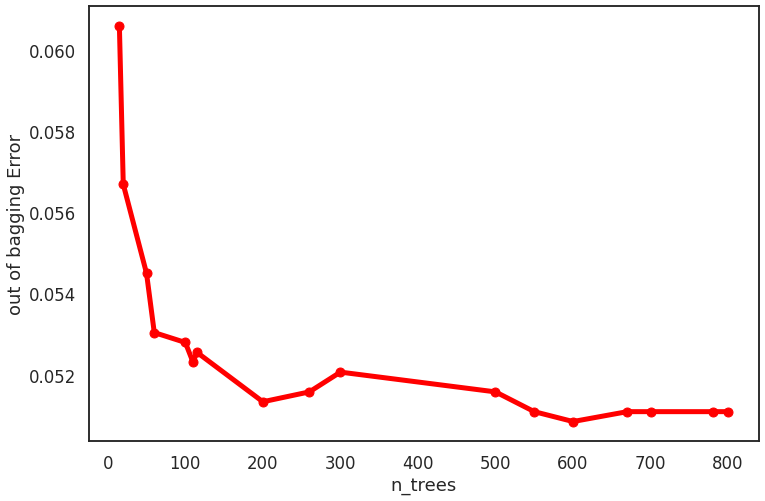

In [ ]:
sns.set_context('talk')
sns.set_style('white')
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(12, 8),linewidth=5, color='red')
ax.set(ylabel='out of bagging Error')